In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df1 = df.copy()
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df1.shape

(8523, 12)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df1.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


## Exploratory Data Analysis

### Univariate Analysis

#### 'Item_Outlet_Sales'

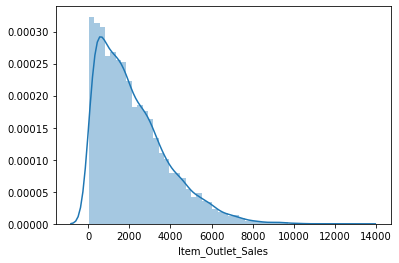

In [7]:
sns.distplot(df1["Item_Outlet_Sales"])
plt.show()

#### 'Numerical Variables'

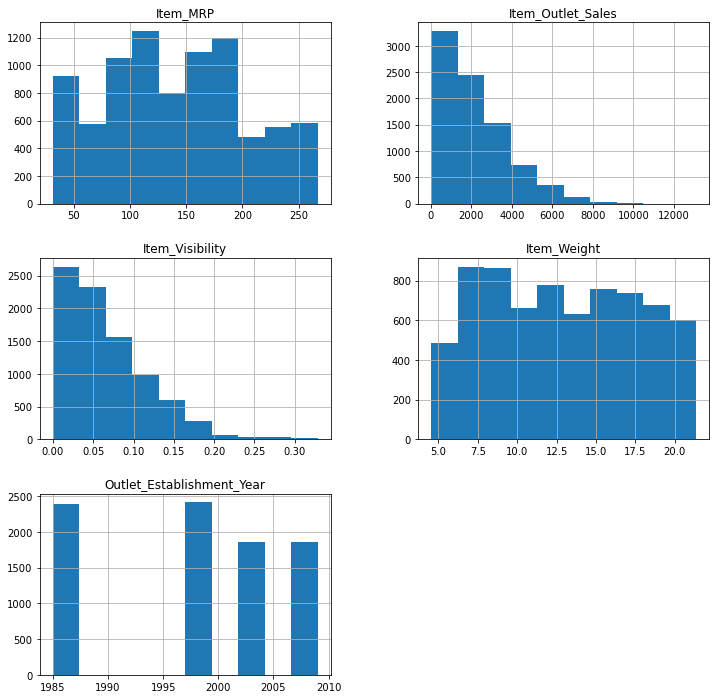

In [8]:
df1.hist(figsize=(12,12))
plt.show()

For 'Item_Visibilty', some of the variables have 0 visibility which is not possible.

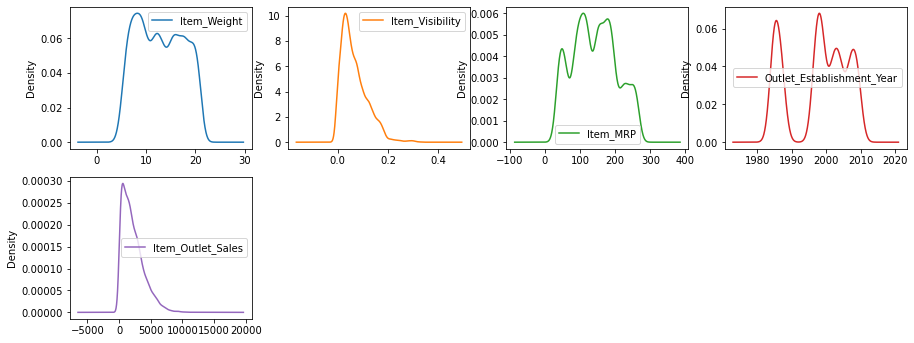

In [9]:
df1.plot(kind="density",subplots=True,layout=(4,4),sharex=False,figsize=(15,12))
plt.show()

#### 'Item_Fat_Content'

In [10]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
df1["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat",inplace = True)
df1["Item_Fat_Content"].replace("reg","Regular",inplace = True)

In [12]:
df1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
df1["Item_Fat_Content"].value_counts(normalize=True)

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

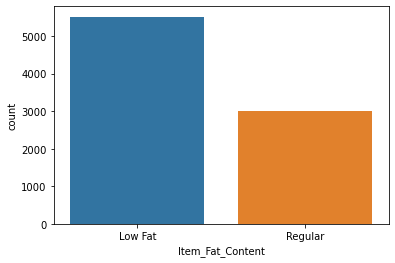

In [14]:
sns.countplot(x = "Item_Fat_Content", data = df1)
plt.show()

#### 'Item_Type'

In [15]:
df1["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

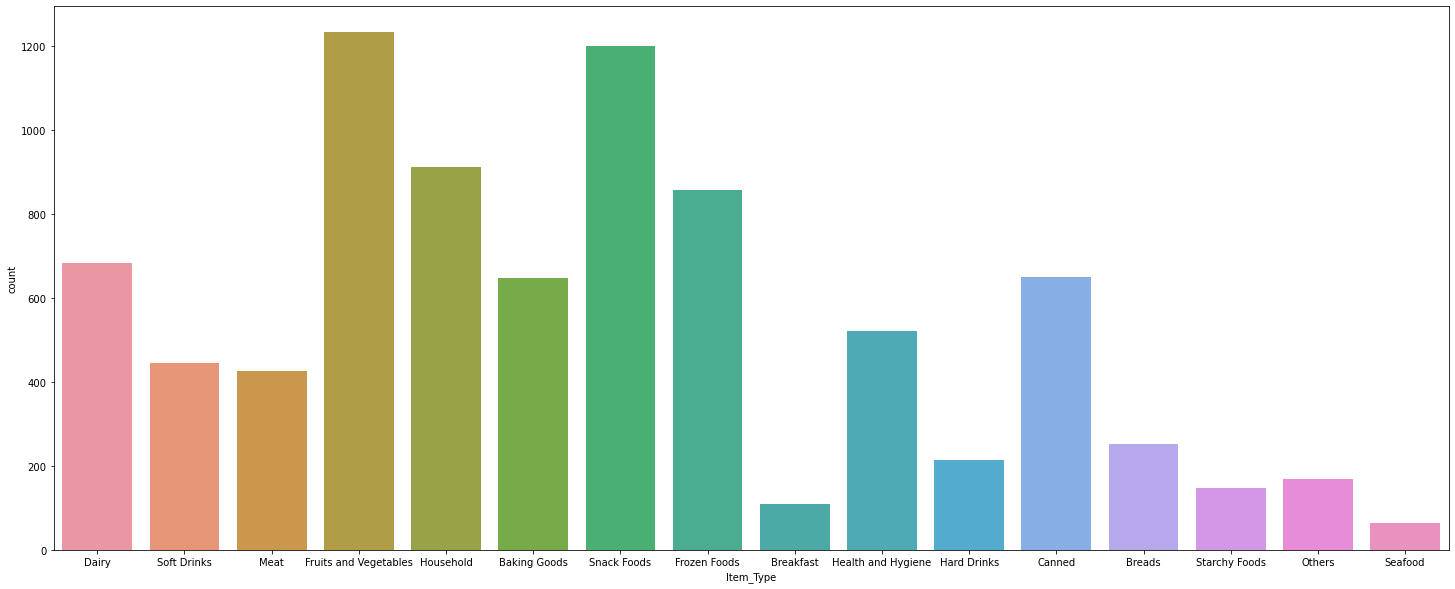

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x = "Item_Type", data = df1)
plt.show()

In [17]:
df1["Item_Identifier"].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [18]:
df1["Item_Type_Modified"] = df1["Item_Identifier"].apply(lambda x:x[0:2])

In [19]:
df1["Item_Type_Modified"].head(10)

0    FD
1    DR
2    FD
3    FD
4    NC
5    FD
6    FD
7    FD
8    FD
9    FD
Name: Item_Type_Modified, dtype: object

In [20]:
df1["Item_Type_Modified"] = df1["Item_Type_Modified"].map({"FD":"Food","DR":"DRINKS","NC":"Non_Consumables"})
df1["Item_Type_Modified"].value_counts()

Food               6125
Non_Consumables    1599
DRINKS              799
Name: Item_Type_Modified, dtype: int64

We can now drop 'Item_Type' column.

#### 'Outlet_Establishment_Year'

In [21]:
df1["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

#### 'Outlet_Size'

In [22]:
df1["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### 'Outlet_Location_Type'

In [23]:
df1["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

#### 'Outlet_Type'

In [24]:
df1["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Bivariate Analysis

#### 'Item_Outlet_Sales' Vs Numerical Variables

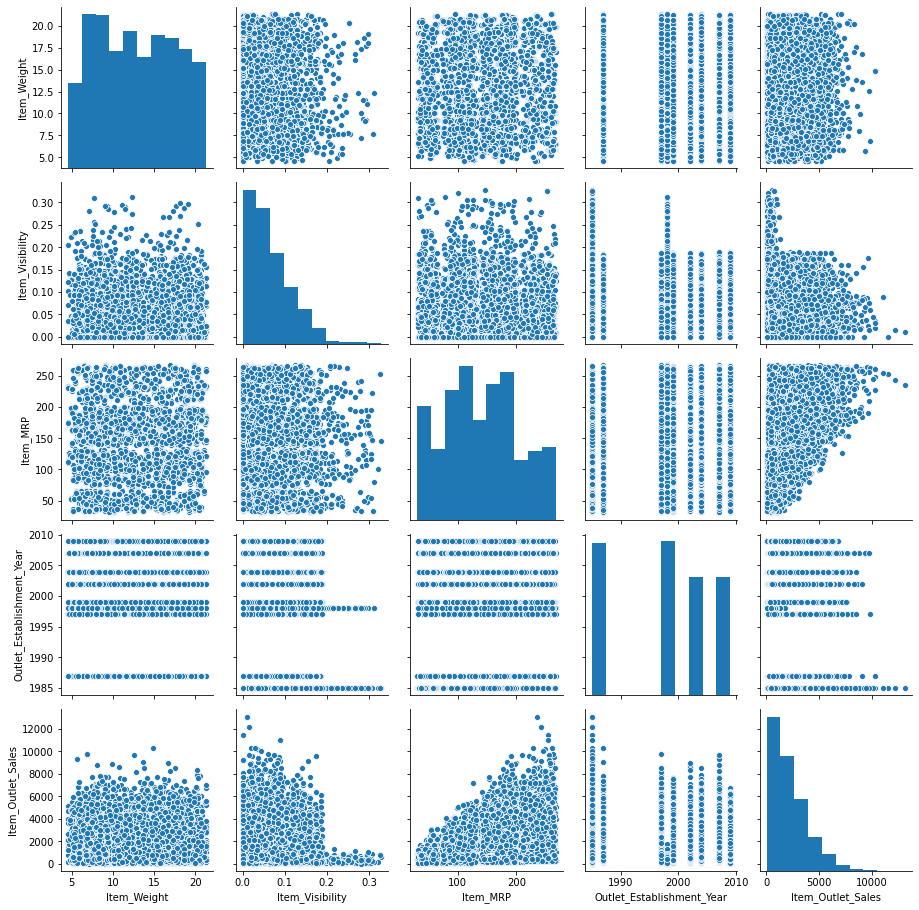

In [25]:
sns.pairplot(df1)
plt.show()

### Missing Value Imputation

In [26]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Type_Modified              0
dtype: int64

#### Imputing Missing Values for 'Item_Weight' .

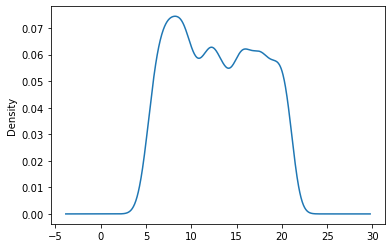

In [27]:
df1["Item_Weight"].plot(kind="kde")
plt.show()

In [28]:
df1["Item_Weight"].fillna(df1["Item_Weight"].mean(),inplace=True)

#### Imputing Missing Values for 'Outlet_Size'

In [29]:
df1["Outlet_Size"].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

Instead of imputing the missing values with Mode, we impute it in ratio of the outlet sizes randomly such that the proportion before and after imputing remains the same.

In [30]:
df1["Outlet_Size"].fillna(pd.Series(np.random.choice(["Medium","Small","High"],p=[0.46,0.39,0.15],size = len(df1))),inplace=True)

In [31]:
df1["Outlet_Size"].value_counts(normalize=True)

Medium    0.464625
Small     0.385310
High      0.150065
Name: Outlet_Size, dtype: float64

In [32]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Type_Modified           0
dtype: int64

#### 'Item_Visibility'

In [33]:
df1["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [34]:
df1["Item_Visibility"].replace(0,df1["Item_Visibility"].mean(),inplace = True)

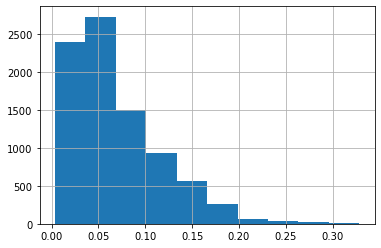

In [35]:
df1["Item_Visibility"].hist()
plt.show()

### Converting Categorical to Numerical.

In [36]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Modified
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DRINKS
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non_Consumables


In [37]:
Item_Fat_Content_d = pd.get_dummies(df1["Item_Fat_Content"],drop_first = True)
Item_Type_Modified_d = pd.get_dummies(df1["Item_Type_Modified"],drop_first = True)
Outlet_Size_d = pd.get_dummies(df1["Outlet_Size"],drop_first = True)
Outlet_Location_Type_d = pd.get_dummies(df1["Outlet_Location_Type"],drop_first = True)
Outlet_Type_d = pd.get_dummies(df1["Outlet_Type"],drop_first = True)

In [38]:
df2 = pd.concat([df1,Item_Fat_Content_d,Item_Type_Modified_d,Outlet_Size_d,Outlet_Location_Type_d,Outlet_Type_d])
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Regular,Food,Non_Consumables,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998.0,Small,Tier 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCD19,8.93,Low Fat,0.066132,Household,53.8614,OUT013,1987.0,High,Tier 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Modified', 'Regular',
       'Food', 'Non_Consumables', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [40]:
df3 = df2.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Item_Type_Modified","Outlet_Type"],axis=1)
df3.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Regular,Food,Non_Consumables,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.92,0.019278,48.2692,443.4228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.50,0.016760,141.6180,2097.2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.20,0.066132,182.0950,732.3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.93,0.066132,53.8614,994.7052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df3.shape

(51138, 14)

In [42]:
df3.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Regular', 'Food', 'Non_Consumables', 'Medium', 'Small', 'Tier 2',
       'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [43]:
df3.replace(np.nan,0,inplace=True)

## Correlation

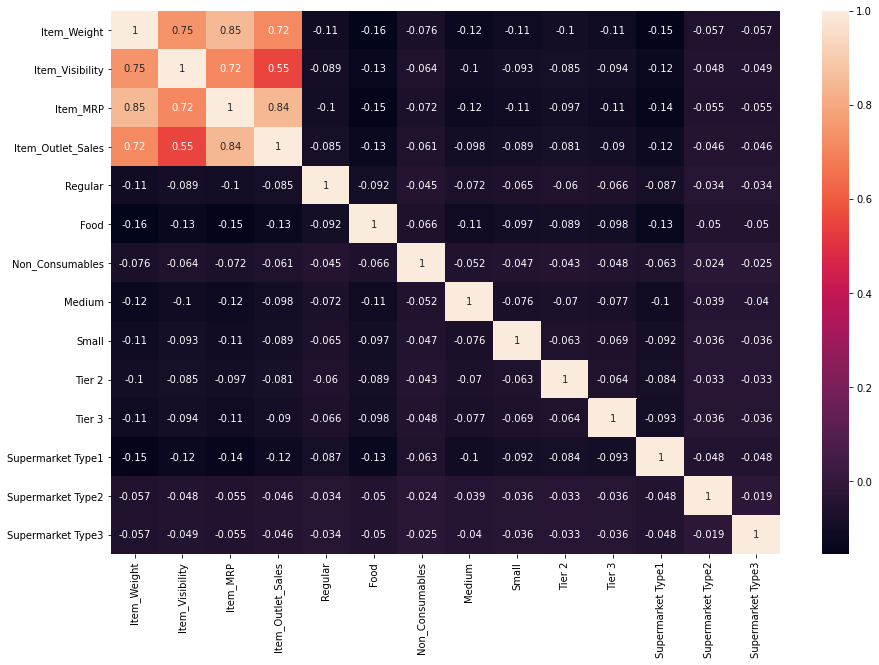

In [44]:
plt.figure(figsize=(15,10))
corr = df3.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot = True)
plt.show()

## Correlation of Dependent variable with all the Independent variables.

In [45]:
X = df3.drop(["Item_Outlet_Sales"],axis=1)
y = df3["Item_Outlet_Sales"]

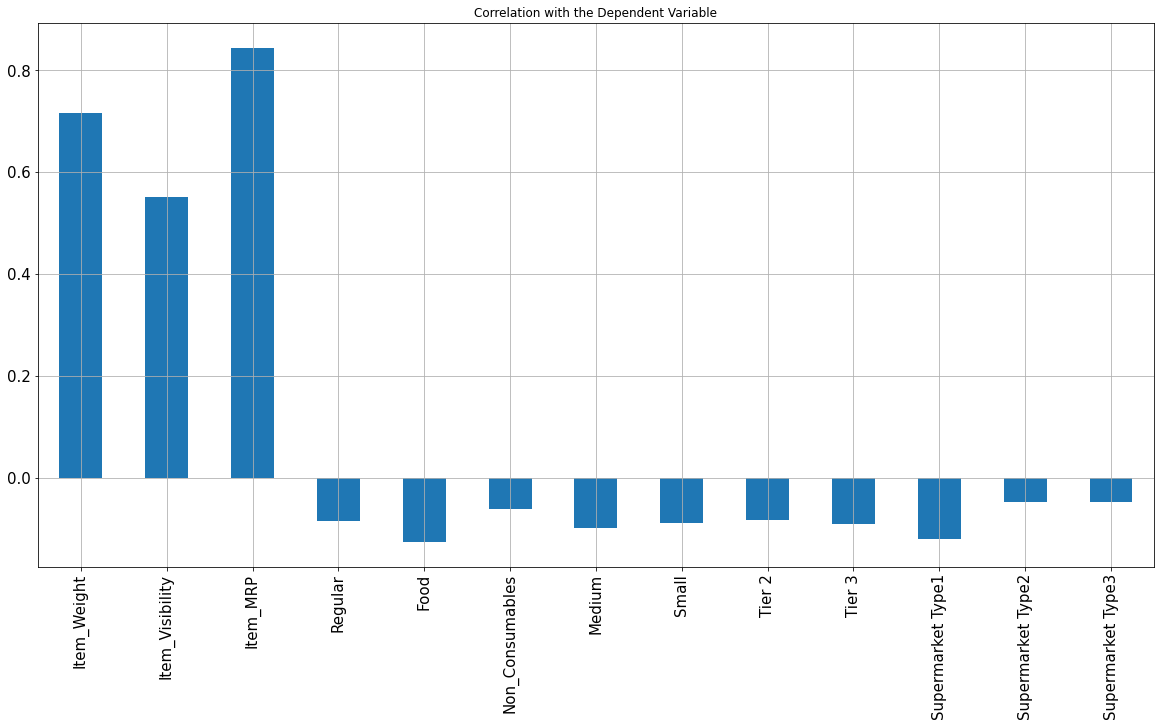

In [46]:
X.corrwith(y).plot.bar(figsize=(20,10),title="Correlation with the Dependent Variable",fontsize=15,grid=True)

In [47]:
df3.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Regular', 'Food', 'Non_Consumables', 'Medium', 'Small', 'Tier 2',
       'Tier 3', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

In [48]:
df3.columns = ["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales","Regular","Food","Non_Consumables","Medium","Small","Tier_2","Tier_3","Supermarket_Type1","Supermarket_Type2","Supermarket_Type3"]

## Train-Test Split

In [49]:
from sklearn.model_selection import train_test_split

trainingset,testingset= train_test_split(df3,test_size = 0.2, random_state=10)

In [50]:
trainingset.shape, testingset.shape

((40910, 14), (10228, 14))

## Model-Building

In [51]:
df3.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Regular', 'Food', 'Non_Consumables', 'Medium', 'Small', 'Tier_2',
       'Tier_3', 'Supermarket_Type1', 'Supermarket_Type2',
       'Supermarket_Type3'],
      dtype='object')

In [52]:
import statsmodels.formula.api as smf

In [53]:
model1 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_Consumables + Regular + Small + Supermarket_Type1 + Supermarket_Type2 + Supermarket_Type3 + Tier_2 + Tier_3",data = trainingset)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8133.
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:55   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40896   BIC:                         6.352e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.2413      5.92

We eliminate 'Supermarket_Type2'

In [54]:
model2 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_Consumables + Regular + Small + Supermarket_Type1 + Supermarket_Type3 + Tier_2 + Tier_3",data = trainingset)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8811.
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:55   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40897   BIC:                         6.352e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            15.9574      5.69

We eliminate 'Supermarket_Type3'

In [55]:
model3 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Non_Consumables + Regular + Small + Supermarket_Type1 + Tier_2 + Tier_3",data = trainingset)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     9612.
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:55   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40898   BIC:                         6.352e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.8487      5.49

We eliminate 'Non_Consumables'

In [56]:
model4 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Regular + Small + Supermarket_Type1 + Tier_2 + Tier_3",data = trainingset)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.057e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:55   Log-Likelihood:            -3.1754e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40899   BIC:                         6.352e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.2755      5.19

We eliminate 'Tier_2'

In [57]:
model5 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Regular + Small + Supermarket_Type1 + Tier_3",data = trainingset)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.175e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40900   BIC:                         6.352e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.2123      4.77

We eliminate 'Regular'

In [58]:
model6 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Small + Supermarket_Type1 + Tier_3",data = trainingset)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.322e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40901   BIC:                         6.352e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.5739      4.41

We eliminate 'Small'

In [59]:
model7 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Supermarket_Type1 + Tier_3",data = trainingset)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.510e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40902   BIC:                         6.352e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.2681      4.10

We eliminate 'Tier_3'

In [60]:
model8 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Medium + Supermarket_Type1",data = trainingset)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.762e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40903   BIC:                         6.352e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.2641      3.84

We eliminate 'Medium'

In [61]:
model9 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight + Supermarket_Type1",data = trainingset)
result9 = model9.fit()
print(result9.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.115e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40904   BIC:                         6.352e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.3439      3.59

We eliminate 'Supermarket_Type1'

In [62]:
model10 = smf.ols(formula = "Item_Outlet_Sales ~ Food + Item_MRP + Item_Visibility + Item_Weight ",data = trainingset)
result10 = model10.fit()
print(result10.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.643e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40905   BIC:                         6.351e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3791      3.307     

We eliminate 'Food'

In [63]:
model11 = smf.ols(formula = "Item_Outlet_Sales ~ Item_MRP + Item_Visibility + Item_Weight ",data = trainingset)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 3.525e+04
Date:                Sat, 11 Jul 2020   Prob (F-statistic):               0.00
Time:                        11:57:56   Log-Likelihood:            -3.1755e+05
No. Observations:               40910   AIC:                         6.351e+05
Df Residuals:                   40906   BIC:                         6.351e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.6121      3.062     

## Train-Test Metric

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

#### Train-Set Metrics

In [65]:
pred1 = result11.predict(trainingset[["Item_MRP","Item_Visibility","Item_Weight"]])

In [66]:
print("Train MSE: ",mean_squared_error(trainingset["Item_Outlet_Sales"],pred1))
print("Train RMSE: ",np.sqrt(mean_squared_error(trainingset["Item_Outlet_Sales"],pred1)))
print("R-square: ",r2_score(trainingset["Item_Outlet_Sales"],pred1))

Train MSE:  323282.8929647005
Train RMSE:  568.5797155761895
R-square:  0.7210481383294439


#### Test-set Metrics

In [67]:
pred2 = result11.predict(testingset[["Item_MRP","Item_Visibility","Item_Weight"]])

In [118]:
print("Test MSE: ",mean_squared_error(testingset["Item_Outlet_Sales"],pred2))

mlr_rmse = np.sqrt(mean_squared_error(testingset["Item_Outlet_Sales"],pred2))
print("Test RMSE: ",mlr_rmse)

mlr_r2 = r2_score(testingset["Item_Outlet_Sales"],pred2)
print("R-square: ",mlr_r2)

Test MSE:  315612.3797433712
Test RMSE:  561.7938943628448
R-square:  0.7117320796672983


## Train-Test Split

In [69]:
X = df3.drop(["Item_Outlet_Sales"],axis=1)
y = df3["Item_Outlet_Sales"]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Decision Trees

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt_model1 = DecisionTreeRegressor(random_state=10)
dt_model1.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [73]:
dt_pred1 = dt_model1.predict(X_test)

In [120]:
print("MSE: ",mean_squared_error(y_test,dt_pred1))

dt1_rmse = np.sqrt(mean_squared_error(y_test,dt_pred1))
print("RMSE: ",dt1_rmse)

dt1_r2 = r2_score(y_test,dt_pred1)
print("R-square: ",dt1_r2)

MSE:  579346.5952956354
RMSE:  761.1482084953202
R-square:  0.4708476317896657


In [75]:
train_accuracy=[]
test_accuracy=[]

for depth in range(1,11):
    dt_model2 = DecisionTreeRegressor(max_depth = depth,random_state=10)
    dt_model2.fit(X_train,y_train)
    train_accuracy.append(dt_model2.score(X_train,y_train))
    test_accuracy.append(dt_model2.score(X_test,y_test))

In [76]:
frame = pd.DataFrame({"Max Depth":range(1,11),"Train Accuracy":train_accuracy,"Test Accuracy":test_accuracy})
frame

,Max Depth,Train Accuracy,Test Accuracy
0,1,0.624630,0.613410
1,2,0.695508,0.687283
2,3,0.713856,0.698549
3,4,0.725042,0.712077
4,5,0.731334,0.718639
5,6,0.735845,0.710799
6,7,0.742547,0.710196
7,8,0.752494,0.708682
8,9,0.764830,0.696016
9,10,0.780737,0.693675


No handles with labels found to put in legend.


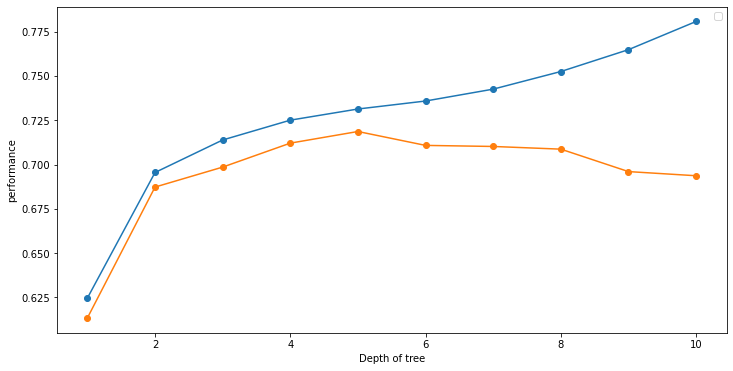

In [77]:
plt.figure(figsize=(12,6))
plt.plot(frame['Max Depth'], frame['Train Accuracy'], marker='o')
plt.plot(frame['Max Depth'], frame['Test Accuracy'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

Since both the Train and Test score is highest at depth = 5, we select "max_depth" = 5.

In [78]:
dt_model3 = DecisionTreeRegressor(max_depth=5,random_state = 10)

In [79]:
dt_model3.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [80]:
dt_pred3 = dt_model3.predict(X_test)

In [121]:
print("MSE: ",mean_squared_error(y_test,dt_pred3))

dt2_rmse = np.sqrt(mean_squared_error(y_test,dt_pred3))
print("RMSE: ",dt2_rmse)

dt2_r2 = r2_score(y_test,dt_pred3)
print("R-square: ",dt2_r2)

MSE:  308050.783434207
RMSE:  555.0232278330403
R-square:  0.7186385439961391


## Random Forests

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rf1 = RandomForestRegressor()
rf1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
rf_pred1 = rf1.predict(X_test)

In [122]:
print("MSE: ",mean_squared_error(y_test,rf_pred1))

rf1_rmse = np.sqrt(mean_squared_error(y_test,rf_pred1))
print("RMSE: ",rf1_rmse)

rf1_r2 = r2_score(y_test,rf_pred1)
print("R-square: ",rf1_r2)

MSE:  364587.1061065572
RMSE:  603.8104885695157
R-square:  0.6670004930005833


In [92]:
rf1.feature_importances_

array([0.05354578, 0.12834354, 0.81811068, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

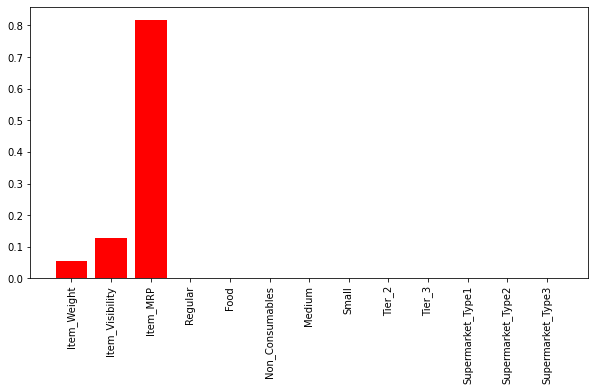

In [96]:
fig, ax = plt.subplots(figsize=(10,5))
bar_rects = ax.bar(np.arange(13), rf1.feature_importances_, color='r', align='center')
ax.xaxis.set_ticks(np.arange(13))
ax.set_xticklabels(X.columns, rotation='vertical')
plt.show()

## Random Forests with RandomizedSearchCV

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [100]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 2)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [101]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [102]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf2 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [103]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [104]:
#Using the best estimators to train the model.
rf2 = rf_random.best_estimator_

In [105]:
rf2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
rf_pred2 = rf2.predict(X_test)

In [123]:
print("MSE: ",mean_squared_error(y_test,rf_pred2))

rf2_rmse = np.sqrt(mean_squared_error(y_test,rf_pred2))
print("RMSE: ",rf2_rmse)

rf2_r2 = r2_score(y_test,rf_pred2)
print("R-square: ",rf2_r2)

MSE:  324272.88650527084
RMSE:  569.4496347397818
R-square:  0.7038219138008323


In [110]:
importances = rf2.feature_importances_
print(importances)

[2.61967242e-01 2.61229425e-01 4.65040760e-01 6.10731469e-04
 3.81736983e-03 1.23766223e-04 1.69779683e-03 9.64709259e-04
 3.87758782e-04 9.69245111e-04 3.11106112e-03 2.97590781e-05
 5.03753866e-05]


In [111]:
indices = np.argsort(importances)[::-1]   # Returns the indices that would sort the given array

In [115]:
names = [X.columns[i] for i in indices]
names

['Item_MRP',
 'Item_Weight',
 'Item_Visibility',
 'Food',
 'Supermarket_Type1',
 'Medium',
 'Tier_3',
 'Small',
 'Regular',
 'Tier_2',
 'Non_Consumables',
 'Supermarket_Type3',
 'Supermarket_Type2']

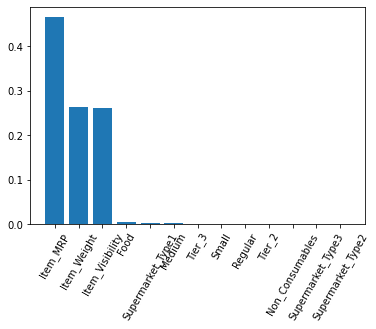

In [116]:
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]) ,names, rotation = 60)
plt.show()

## Summary

In [126]:
data = [["Multiple Linear Regression (OLS Method)",mlr_r2,mlr_rmse],["Decision Trees",dt1_r2,dt1_rmse],["Decision Trees (max_depth=5)",dt2_r2,dt2_rmse],["Random Forests",rf1_r2,rf1_rmse],["Random Forests with RandomizedSearchCV",rf2_r2,rf2_rmse]]
summary = pd.DataFrame(data,columns = ["Algorithms","R-square","RMSE"])
summary

,Algorithms,R-square,RMSE
0,Multiple Linear Regression (OLS Method),0.711732,561.793894
1,Decision Trees,0.470848,761.148208
2,Decision Trees (max_depth=5),0.718639,555.023228
3,Random Forests,0.667000,603.810489
4,Random Forests with RandomizedSearchCV,0.703822,569.449635


### R-square plot

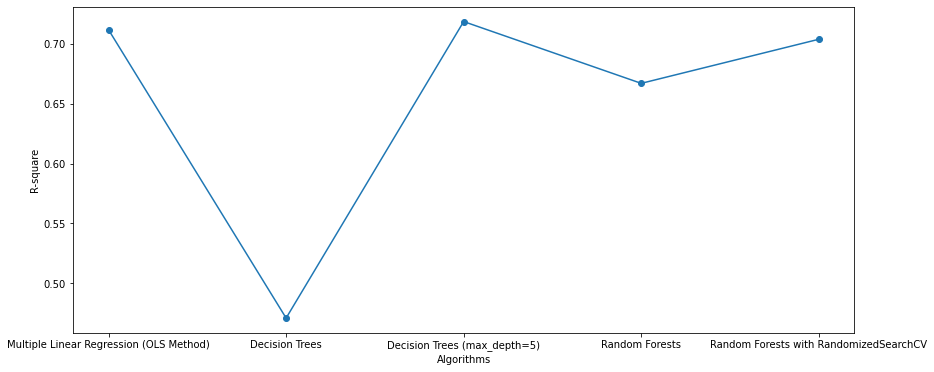

In [133]:
plt.figure(figsize=(14,6))
plt.plot(summary['Algorithms'], summary['R-square'], marker='o')
plt.xlabel('Algorithms')
plt.ylabel('R-square')
plt.show()

### RMSE plot

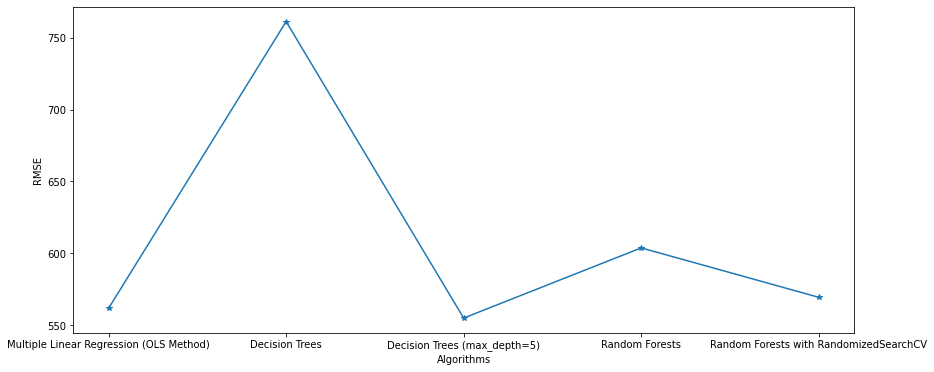

In [134]:
plt.figure(figsize=(14,6))
plt.plot(summary['Algorithms'], summary['RMSE'], marker='*')
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.show()